In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf 

In [11]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [12]:
## no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
# rename column
data1=data.rename({'YearsExperience':'exp','Salary':'salary'},axis=1)
data1.head()

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# correlation

In [14]:
data1.corr()

,exp,salary
exp,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='exp', ylabel='salary'>

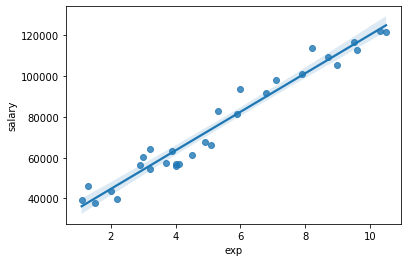

In [15]:
sns.regplot(x='exp',y='salary',data=data1) 

<AxesSubplot:>

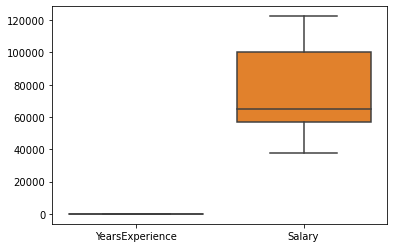

In [16]:
sns.boxplot(data=data)

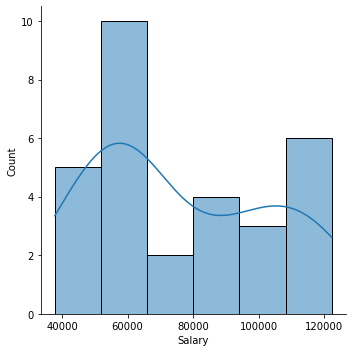

In [28]:
sns.displot(data['Salary'],kde=True)

# Model Building

In [17]:
model=smf.ols('salary~exp',data=data1).fit()

# Model Testing

In [18]:
# Parameters
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [19]:
# Find t_value anf p_value
model.tvalues,model.pvalues

(Intercept    11.346940
 exp          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 exp          1.143068e-20
 dtype: float64)

In [20]:
# Find rsquare values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Prediction


In [21]:
#Manual Model Pridiction for 5 years
#y=mx+c
#y=Salaty
#c=intercept
#m=Line gradient
#x=YearsExperience
salary=9449.962321*5+25792.200199
salary

73042.01180400001

In [22]:
# Automatic prediction
new_data=pd.Series([3,10,4,2,9,8])

In [23]:
data_pred=pd.DataFrame(new_data,columns=['exp'])

In [24]:
model.predict(data_pred)

0     54142.087163
1    120291.823413
2     63592.049484
3     44692.124842
4    110841.861092
5    101391.898770
dtype: float64

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        11:47:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""